# 1-Import Libraries

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 2-Read Dataset

In [4]:
df=pd.read_csv('E:/Dataset/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3-Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

# 4-Visualization

<Axes: xlabel='Survived', ylabel='count'>

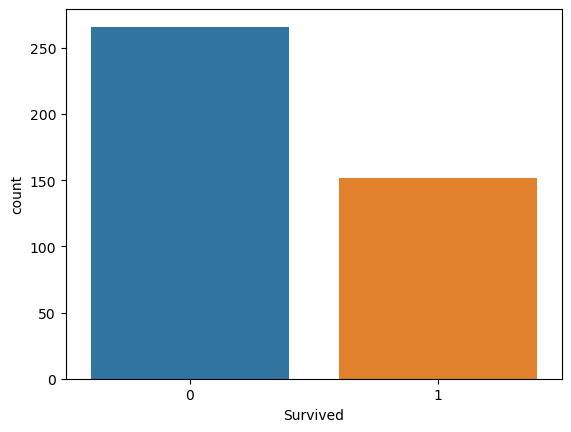

In [9]:
sns.countplot(x='Survived',data =df)

<Axes: xlabel='Survived', ylabel='count'>

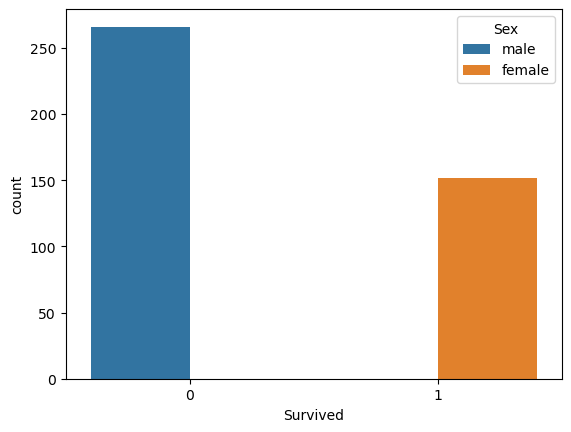

In [10]:
sns.countplot(x='Survived',hue='Sex',data =df)

<Axes: >

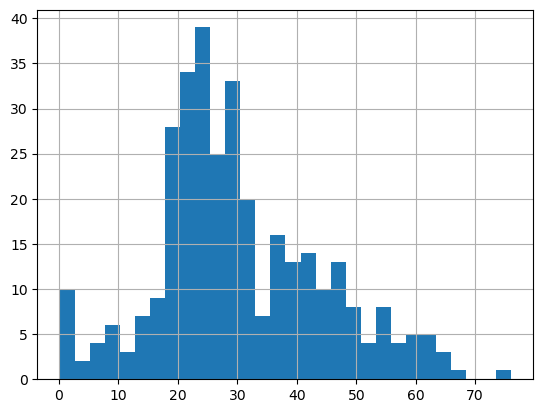

In [11]:
df['Age'].hist(bins=30)

<Axes: xlabel='Pclass', ylabel='Age'>

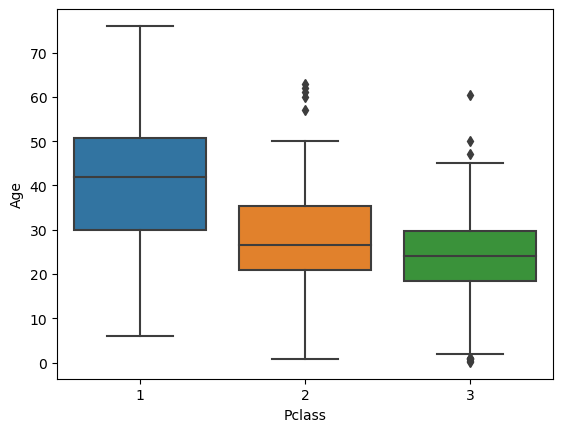

In [12]:
sns.boxplot(x='Pclass',y='Age',data=df)

<Axes: xlabel='SibSp', ylabel='count'>

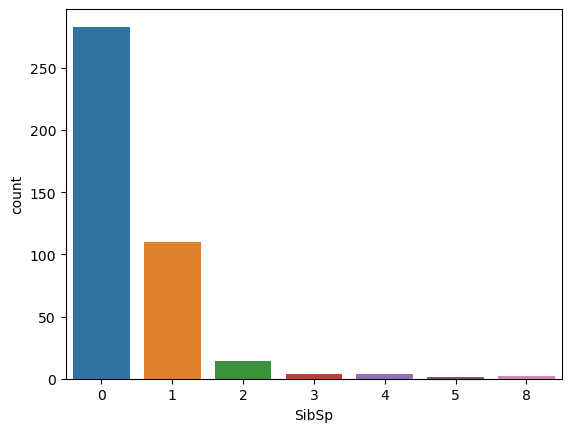

In [13]:
sns.countplot(x='SibSp',data=df)

## 5-Data Preprocessing 

In [14]:
# drop columnns that i don't need 
df.drop(columns=['PassengerId','Name','Ticket','Fare','Cabin'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,34.5,0,0,Q
1,1,3,female,47.0,1,0,S
2,0,2,male,62.0,0,0,Q
3,0,3,male,27.0,0,0,S
4,1,3,female,22.0,1,1,S


In [15]:
# fill the missing values in Ae column with mean 
df.Age.fillna(df.Age.mean(), inplace=True)

In [16]:
# check if there is no missing values yet 
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

# Handling the categorical Data 

In [17]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
Sex_mapping={'male':1,'female':0}
df.Sex=df.Sex.map(Sex_mapping)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,34.5,0,0,Q
1,1,3,0,47.0,1,0,S
2,0,2,1,62.0,0,0,Q
3,0,3,1,27.0,0,0,S
4,1,3,0,22.0,1,1,S


In [19]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [20]:
Embarked_mapping={'Q':0,'S':1,'C':2}
df['Embarked']=df['Embarked'].map(Embarked_mapping)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,34.5,0,0,0
1,1,3,0,47.0,1,0,1
2,0,2,1,62.0,0,0,0
3,0,3,1,27.0,0,0,1
4,1,3,0,22.0,1,1,1


# 6-Splitting Data 

In [21]:
x=df.drop(columns=['Survived'])
y=df.Survived
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [23]:
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

x_train shape: (334, 6)
x_test shape: (84, 6)
y_train shape: (334,)
y_test shape: (84,)


# 7-Building The Model

In [25]:
# Call LogisticRegression model 
model=LogisticRegression()

In [26]:
# fit the model on the train data
model.fit(x_train, y_train)

LogisticRegression()

In [27]:
# prediction of model 
y_pred =model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [28]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
270,1,1,46.00000,0,0,2
311,3,1,22.00000,0,0,2
29,3,1,30.27259,2,0,2
224,1,0,53.00000,0,0,2
157,3,0,23.00000,0,0,1


In [31]:
# testing the prediction of model on data from x_test 
model.predict([[3,1,22.00000,0,0,2]])

E:\anacond222\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [32]:
y_test.head()

270    0
311    0
29     0
224    1
157    1
Name: Survived, dtype: int64

# 8-Evaluate Model

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [36]:
y_test.value_counts()

0    51
1    33
Name: Survived, dtype: int64

In [37]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[51,  0],
       [ 0, 33]], dtype=int64)

<Axes: >

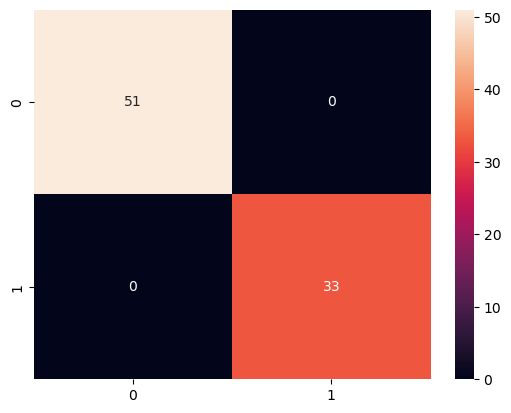

In [38]:
sns.heatmap(cm,annot=True)